In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/healthcare-dataset/healthcare_dataset.csv")

In [3]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [4]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [5]:
df.shape

(55500, 15)

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [8]:
cat_col = df.select_dtypes(include=['object']).columns.tolist()

# OBS: Os gráficos númericos são muito ruins de observarmos
num_col = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

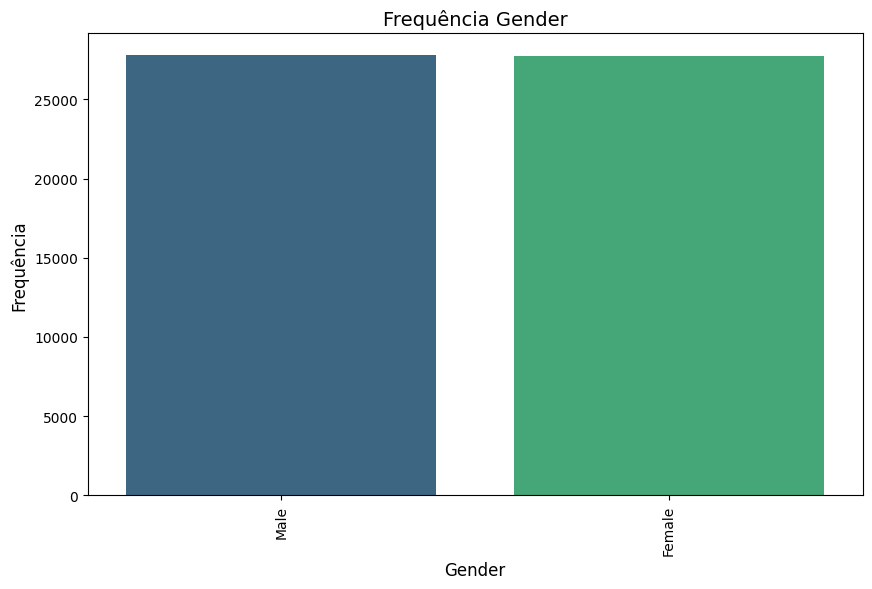

Frequência da coluna Gender:
   Gender  Frequência
0    Male       27774
1  Female       27726


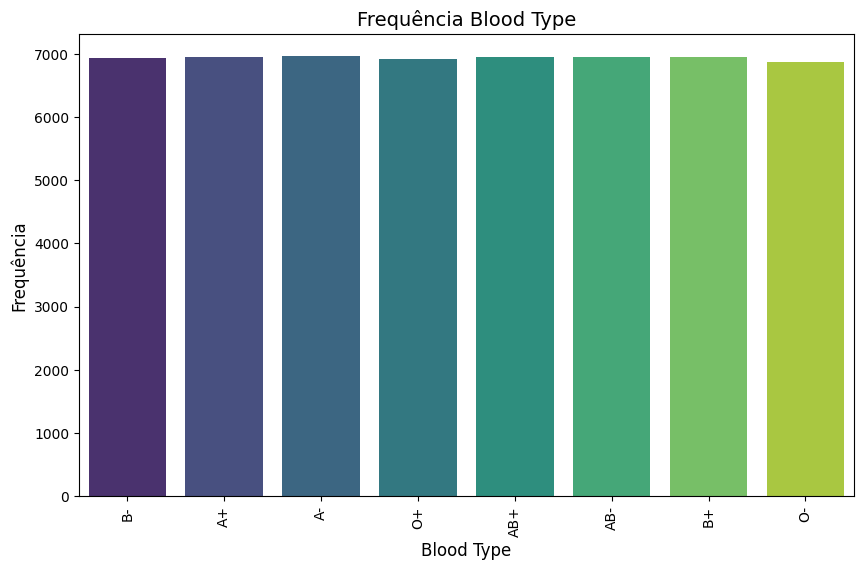

Frequência da coluna Blood Type:
  Blood Type  Frequência
0         A-        6969
1         A+        6956
2        AB+        6947
3        AB-        6945
4         B+        6945
5         B-        6944
6         O+        6917
7         O-        6877


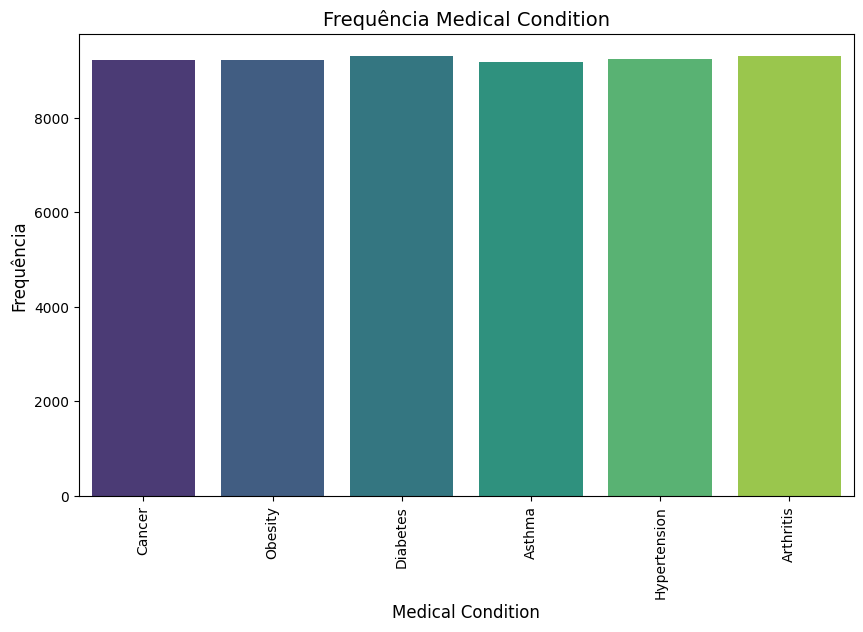

Frequência da coluna Medical Condition:
  Medical Condition  Frequência
0         Arthritis        9308
1          Diabetes        9304
2      Hypertension        9245
3           Obesity        9231
4            Cancer        9227
5            Asthma        9185


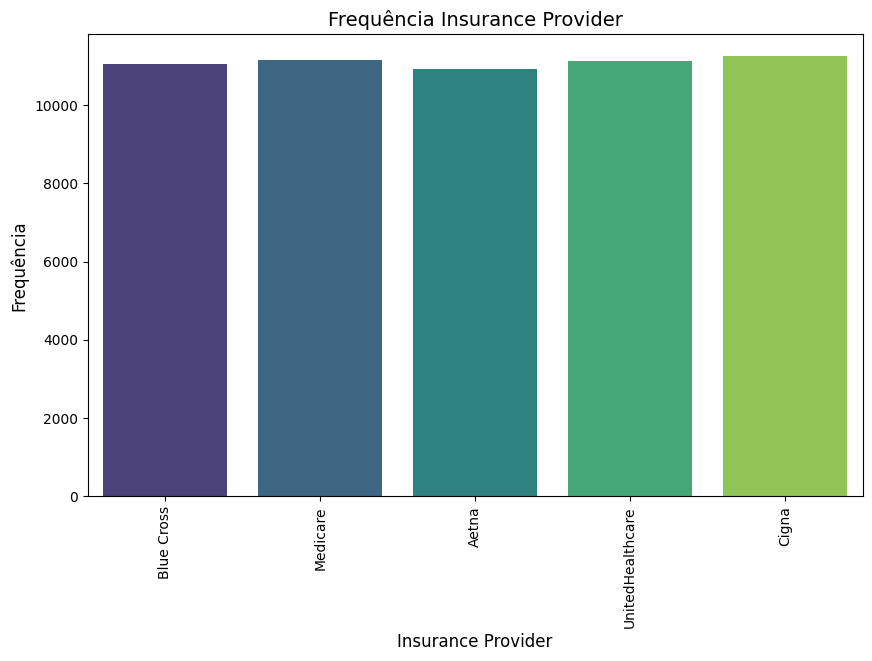

Frequência da coluna Insurance Provider:
  Insurance Provider  Frequência
0              Cigna       11249
1           Medicare       11154
2   UnitedHealthcare       11125
3         Blue Cross       11059
4              Aetna       10913


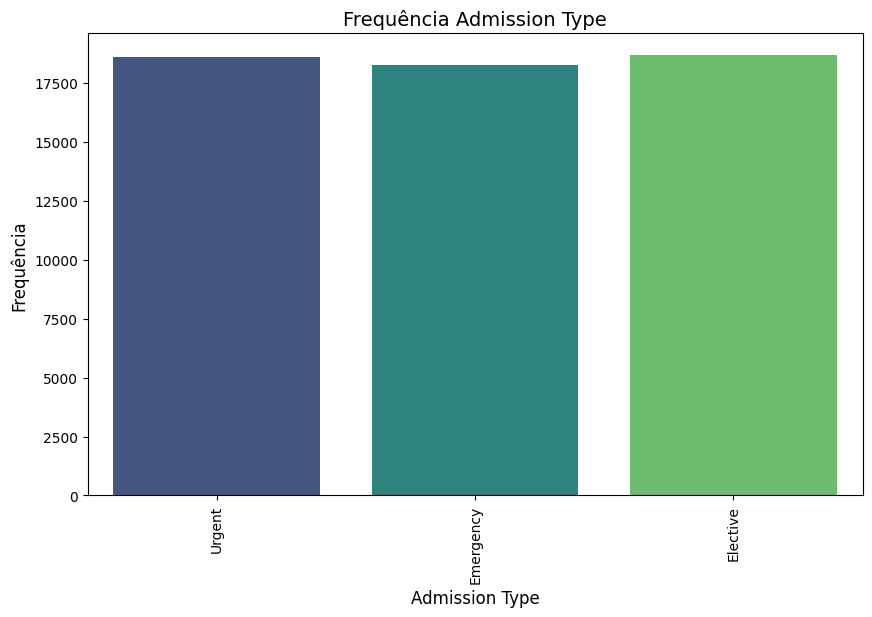

Frequência da coluna Admission Type:
  Admission Type  Frequência
0       Elective       18655
1         Urgent       18576
2      Emergency       18269


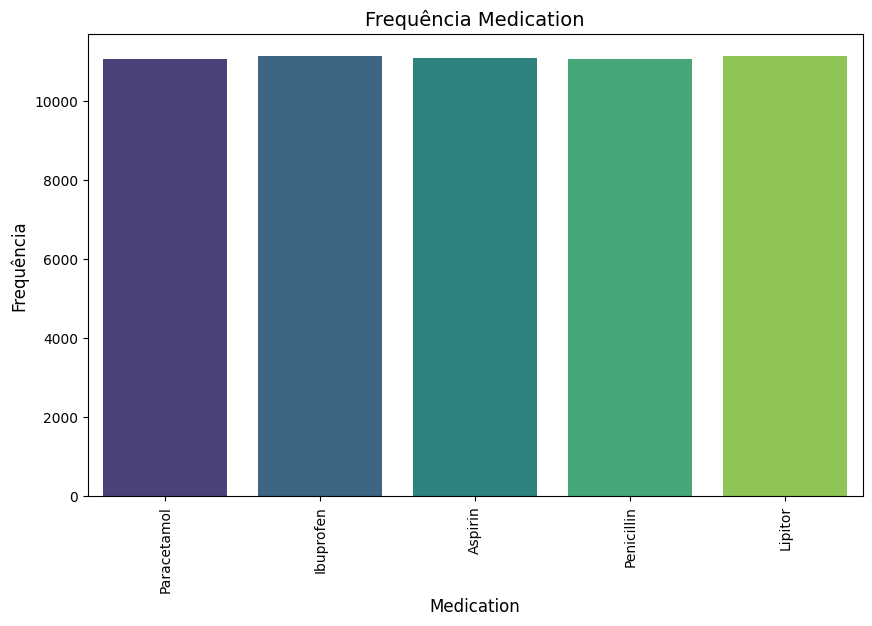

Frequência da coluna Medication:
    Medication  Frequência
0      Lipitor       11140
1    Ibuprofen       11127
2      Aspirin       11094
3  Paracetamol       11071
4   Penicillin       11068


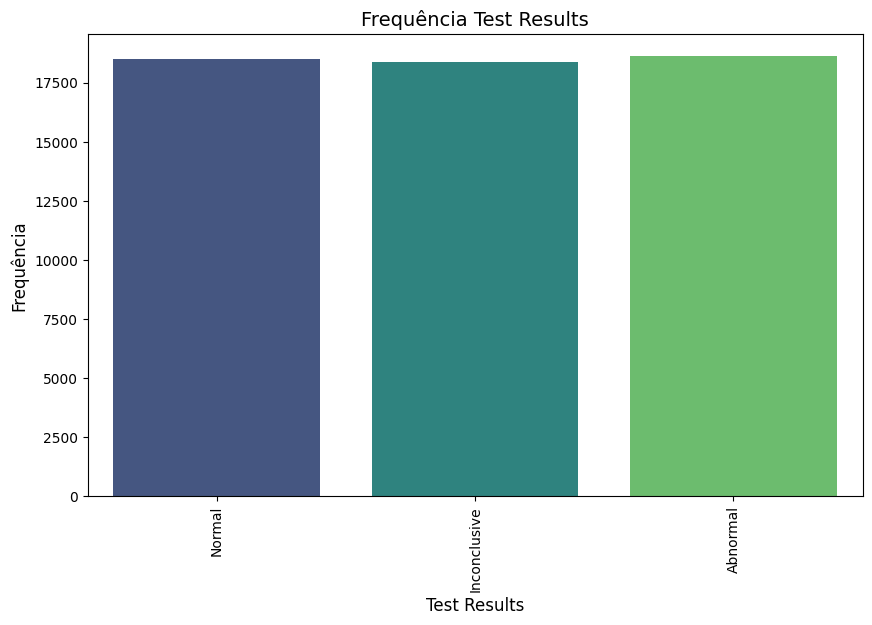

Frequência da coluna Test Results:
   Test Results  Frequência
0      Abnormal       18627
1        Normal       18517
2  Inconclusive       18356


In [9]:
# Itera pelas colunas do "DataFrame" agrupadas como cat_col e num_col
for coluna in cat_col:
    if coluna == 'Name' or coluna == 'Date of Admission' or coluna == 'Doctor' or coluna == 'Hospital' or coluna == 'Discharge Date':
        continue
    # Cria o gráfico de contagem
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=coluna, palette='viridis')
    plt.title(f'Frequência {coluna}', fontsize=14)
    plt.xlabel(coluna, fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.xticks(rotation=90)
    plt.show()
    # Conta a frequência dos valores na coluna
    qtd = df[coluna].value_counts().reset_index(name='Frequência').rename(columns={'index': coluna})
    # Imprime as frequências
    print(f'Frequência da coluna {coluna}:')
    print(qtd)